# Caso Advanced Analytics: 
## Predicción de Fugas de Clientes para una Institución Financiera
Autor: Rolf Traeger Brautigam
=========

# Inicio
## Import librarys

In [1]:
# ! conda install plotnine
# ! conda install pandas
# ! conda install scikit-learn
# ! conda install -c anaconda git


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from plotnine import (
ggplot,
geom_histogram,
aes,
geom_col,
theme,
element_text,
ggtitle,
scale_x_discrete,
facet_grid,
position_dodge,
geom_text,
# dodge_text,
save_as_pdf_pages,
)
from plotnine import geom_density,after_stat,labs
dodge_text = position_dodge(width=0.9)

## Funciones utiles

In [4]:
import exploratory_lib as exp_lib

In [5]:
dic_med=exp_lib.class_diccionarios()
dic_med.set_list_num(list(range(1,13)))
dic_med.set_list_name(exp_lib.array_mes_name)
dic_med.set_dictionary()

In [6]:
dic_med.int_to_name(1)

'Enero'

In [7]:
dic_dianom=exp_lib.class_diccionarios()
dic_dianom.set_list_num(list(range(1,8)))
dic_dianom.set_list_name(['Lunes', 'Martes', 'Miercoles','Jueves','Viernes', 'Sabado', 'Domingo'])
dic_dianom.set_dictionary()
dic_dianom.name_to_num("LuneS")

1

## Extract CSV y transform using owns librarys

In [8]:
list_name_file_1 = [
    'aportes_rescates_12m',      #.csv
    'cuenta_banco',      #.csv
    'demograficos',      #.csv
    'deudas',        #.csv
    'id_label',      #.csv
    ]
list_name_file_cierre_patrimonio=[
'cierre_patrimonio_202202',        #.csv
'cierre_patrimonio_202203',        #.csv
'cierre_patrimonio_202204',        #.csv
'cierre_patrimonio_202205',        #.csv
'cierre_patrimonio_202206',        #.csv
'cierre_patrimonio_202207',        #.csv
'cierre_patrimonio_202208',        #.csv
'cierre_patrimonio_202209',        #.csv
'cierre_patrimonio_202210',        #.csv
'cierre_patrimonio_202211',        #.csv
'cierre_patrimonio_202212',        #.csv
'cierre_patrimonio_202301',        #.csv
'cierre_patrimonio_202302',        #.csv
]

In [9]:
aportes_rescates_12m = pd.read_csv("bases/aportes_rescates_12m.csv",
                        encoding="utf-8",sep=",",nrows=0, 
                        index_col=0)
# exp_lib.extract_csv("bases","aportes_rescates_12m",',')
cuenta_banco = pd.read_csv("bases/cuenta_banco.csv",
                        encoding="utf-8",sep=",",nrows=0
                        ,index_col=None)
# exp_lib.extract_csv("bases","cuenta_banco",',')
demograficos =  pd.read_csv("bases/demograficos.csv",
                        encoding="utf-8",sep=",",nrows=0
                        ,index_col=None)
deudas =   pd.read_csv("bases/demograficos.csv",
                        encoding="utf-8",sep=",",nrows=0
                        ,index_col=None)
# exp_lib.extract_csv("bases","deudas",',')
id_label = pd.read_csv("bases/id_label.csv",
                        encoding="utf-8",sep=",",nrows=0
                        ,index_col=None)


In [10]:
aportes_rescates_12m = exp_lib.extract_csv("bases","aportes_rescates_12m",',',0)
cuenta_banco = exp_lib.extract_csv("bases","cuenta_banco",',')
demograficos = exp_lib.extract_csv("bases","demograficos",',')
deudas = exp_lib.extract_csv("bases","deudas",',')
id_label = exp_lib.extract_csv("bases","id_label",',')


Dimensiones: (37146, 3)
Columnas 
 n_rescates, n_aportes, id
Dimensiones: (71664, 2)
Columnas 
 id, clasificacion_cliente
Dimensiones: (36970, 10)
Columnas 
 id, fec_nacim, flg_empleado, gls_nacioncorta, gls_residencialarga, gls_profesionlarga, cod_sexo, gls_cod_estcivillarga, gls_niv_educaclarga, gls_sep_bieneslarga
Dimensiones: (367543, 16)
Columnas 
 id, periodo, entidades, disponible, deuda_1, deuda_2, deuda_3, deuda_4, deuda_5, mora_1, mora_2, mora_3, mora_4, mora_5, mora_6, mora_7
Dimensiones: (37146, 2)
Columnas 
 id, label


In [11]:
df_list_cierre_patrimonio = [
    exp_lib.extract_csv(
    "bases/cierre_patrimonio",
    i,
    ',',0).drop(columns=["Unnamed: 0.1"])
    for i in list_name_file_cierre_patrimonio
    ]
df_cierre_patrimonio = \
    pd.concat(df_list_cierre_patrimonio)
del df_list_cierre_patrimonio

Dimensiones: (30674, 4)
Columnas 
 Unnamed: 0.1, patrimonio, fecha_cierre, id
Dimensiones: (31111, 4)
Columnas 
 Unnamed: 0.1, patrimonio, fecha_cierre, id
Dimensiones: (31425, 4)
Columnas 
 Unnamed: 0.1, patrimonio, fecha_cierre, id
Dimensiones: (31997, 4)
Columnas 
 Unnamed: 0.1, patrimonio, fecha_cierre, id
Dimensiones: (32423, 4)
Columnas 
 Unnamed: 0.1, patrimonio, fecha_cierre, id
Dimensiones: (33010, 4)
Columnas 
 Unnamed: 0.1, patrimonio, fecha_cierre, id
Dimensiones: (33994, 4)
Columnas 
 Unnamed: 0.1, patrimonio, fecha_cierre, id
Dimensiones: (34762, 4)
Columnas 
 Unnamed: 0.1, patrimonio, fecha_cierre, id
Dimensiones: (35420, 4)
Columnas 
 Unnamed: 0.1, patrimonio, fecha_cierre, id
Dimensiones: (36341, 4)
Columnas 
 Unnamed: 0.1, patrimonio, fecha_cierre, id
Dimensiones: (37027, 4)
Columnas 
 Unnamed: 0.1, patrimonio, fecha_cierre, id
Dimensiones: (36444, 4)
Columnas 
 Unnamed: 0.1, patrimonio, fecha_cierre, id
Dimensiones: (35956, 4)
Columnas 
 Unnamed: 0.1, patrimonio, fec

## set columns format

In [12]:
exp_lib.columns_cast(
    aportes_rescates_12m,
    ["n_rescates","n_aportes"],
    "float64")
exp_lib.columns_cast(
    aportes_rescates_12m,
    ["id"],
    "int64")
aportes_rescates_12m.head(2)

n_rescates    float64
n_aportes     float64
id             object
dtype: object
n_rescates    float64
n_aportes     float64
id              int64
dtype: object


,n_rescates,n_aportes,id
0,0.0,0.0,0
1,7.0,11.0,1


In [13]:
exp_lib.columns_cast(
    cuenta_banco,
    ["id"],
    "int64")
cuenta_banco.head(2)

id                        int64
clasificacion_cliente    object
dtype: object


,id,clasificacion_cliente
0,37146,segmento_1
1,37147,segmento_1


In [14]:
demograficos["fec_nacim"]=demograficos["fec_nacim"].apply(exp_lib.convert_to_date)
print(
    f"""
    Formato fecha a periodo
    {''.join(str(demograficos["fec_nacim"].to_list()[0]).split('-')[:2])}
    """
    )
exp_lib.columns_cast(
    demograficos,
    ["id"],
    "int64")
demograficos.head(2)


    Formato fecha a periodo
    194304
    
id                                int64
fec_nacim                datetime64[ns]
flg_empleado                     object
gls_nacioncorta                  object
gls_residencialarga              object
gls_profesionlarga               object
cod_sexo                         object
gls_cod_estcivillarga            object
gls_niv_educaclarga              object
gls_sep_bieneslarga              object
dtype: object


,id,fec_nacim,flg_empleado,gls_nacioncorta,gls_residencialarga,gls_profesionlarga,cod_sexo,gls_cod_estcivillarga,gls_niv_educaclarga,gls_sep_bieneslarga
0,10170,1943-04-23,N,Chile,Residencia Propia,PERIODISTA,F,Casado,Universitario Completo,SIN SEPARACIÓN
1,24533,1957-01-18,N,Chile,,OTRA,F,Casado,Medio,SIN SEPARACIÓN


In [15]:
deudas.columns

Index(['id', 'periodo', 'entidades', 'disponible', 'deuda_1', 'deuda_2',
       'deuda_3', 'deuda_4', 'deuda_5', 'mora_1', 'mora_2', 'mora_3', 'mora_4',
       'mora_5', 'mora_6', 'mora_7'],
      dtype='object')

In [16]:
list_name_file_1
# deudas
exp_lib.columns_cast(
    deudas,
    ['disponible', 'deuda_1', 'deuda_2',
       'deuda_3', 'deuda_4', 'deuda_5', 'mora_1', 'mora_2', 'mora_3', 'mora_4',
       'mora_5', 'mora_6', 'mora_7',],
    "float64")
exp_lib.columns_cast(
    deudas,
    ['id', 'periodo','entidades'],
    "int64")

id             object
periodo        object
entidades      object
disponible    float64
deuda_1       float64
deuda_2       float64
deuda_3       float64
deuda_4       float64
deuda_5       float64
mora_1        float64
mora_2        float64
mora_3        float64
mora_4        float64
mora_5        float64
mora_6        float64
mora_7        float64
dtype: object
id              int64
periodo         int64
entidades       int64
disponible    float64
deuda_1       float64
deuda_2       float64
deuda_3       float64
deuda_4       float64
deuda_5       float64
mora_1        float64
mora_2        float64
mora_3        float64
mora_4        float64
mora_5        float64
mora_6        float64
mora_7        float64
dtype: object


In [17]:
# list_name_file_1
exp_lib.columns_cast(
    id_label,
    ['id', 'label'],
    "int64")

id       int64
label    int64
dtype: object


In [19]:
df_cierre_patrimonio["fecha_cierre"]=\
    df_cierre_patrimonio["fecha_cierre"].apply(exp_lib.convert_to_date)
exp_lib.columns_cast(
    df_cierre_patrimonio,
    ["patrimonio"],
    "float64")
exp_lib.columns_cast(
    df_cierre_patrimonio,
    ["id"],
    "int64")
df_cierre_patrimonio.head(2)

patrimonio             float64
fecha_cierre    datetime64[ns]
id                      object
dtype: object
patrimonio             float64
fecha_cierre    datetime64[ns]
id                       int64
dtype: object


,patrimonio,fecha_cierre,id
0,11.804569,2022-02-28,21636
1,3.668090,2022-02-28,707


# Descripción de los datos

dataframes con información: 
- **Estatica** : 
  - id_label
  - demograficos
  - aportes_rescates_12m
  - cuenta_banco
- **Cambiante en el tiempo** :
  - df_cierre_patrimonio 
  - deudas

## Dataframes Estaticos

### Id_label.csv:
Base con id’s (columna id) de clientes junto con su etiqueta
(columna label) de 1 o 0 según corresponda. La columna label contiene 1’s
cuando un cliente retira parte de sus fondos (no importa cuanto, basta que
retire 1 peso para considerarse un 1) durante el mes siguiente (marzo). Por otro lado, la etiqueta de 0’s quiere decir que el cliente mantiene o aumenta
sus fondos en INVIERTE. (no importa cuanto, basta que agregue 1 peso
para considerarse un 0)



In [20]:
df_g = id_label.groupby("label").count().rename(
    columns={"id":"cantidad de cuentas"})
df_g["porcetaje"]=(df_g["cantidad de cuentas"]/ id_label.shape[0])
df_g

,cantidad de cuentas,porcetaje
label,,
0,31287,0.842271
1,5859,0.157729


### demograficos.csv: 

Datos demográficos de los clientes de INVIERTE.
1. fec_nacim:   
    > Fecha de nacimiento.
2. flg_empleado:    
    > S: El cliente es colaborador de YO INVIERTO. N: No es colaborador.
3. gls_nacioncorta:     
    > País de residencia del cliente.
4. gls_residencialarga:     
    > Categoría de la residencia donde vive el cliente.
5. gls_profesionlarga:  
    > Profesión del cliente.
6. gls_sep_bieneslarga:     
    > Indica si el cliente está casado o no. En caso de ser
vacío, el cliente está casado, si el valor es “sin separación” está separado
sin separación de bienes y “con separación” está separado con separación
de bienes.

In [21]:
demograficos.columns

Index(['id', 'fec_nacim', 'flg_empleado', 'gls_nacioncorta',
       'gls_residencialarga', 'gls_profesionlarga', 'cod_sexo',
       'gls_cod_estcivillarga', 'gls_niv_educaclarga', 'gls_sep_bieneslarga'],
      dtype='object')

In [22]:
demograficos.describe(include="all").T

<ipython-input-22-d25b4094788a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
id,36970.0,NaN,NaN,NaN,NaT,NaT,18563.040438,10722.911939,0.0,9281.25,18562.5,27849.75,37145.0
fec_nacim,36941,19719,1973-11-30 00:00:00,12,1902-08-21,2023-07-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flg_empleado,36970,2,N,36230,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gls_nacioncorta,36970,59,Chile,35763,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gls_residencialarga,36970,6,,17009,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gls_profesionlarga,36970,144,OTRA,15117,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cod_sexo,36970,4,M,20460,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gls_cod_estcivillarga,36970,8,Casado,13902,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gls_niv_educaclarga,36970,8,Universitario Completo,15870,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gls_sep_bieneslarga,36970,6,,23716,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:

df_merge = \
    pd.merge(id_label,demograficos,how="left", on= "id")
print(
f"""
Total de registros de id_label {id_label.shape}
Total de registros de demograficos {demograficos.shape}
Cuentas que poseen información demografica:
    {df_merge[df_merge.cod_sexo.notnull()].shape}
Cuentas sin información demografica:
    {df_merge[df_merge.cod_sexo.notnull() == False].shape}
""")



Total de registros de id_label (37146, 2)
Total de registros de demograficos (36970, 10)
Cuentas que poseen información demografica:
    (36970, 11)
Cuentas sin información demografica:
    (176, 11)



### cuenta_banco.csv:
Cuenta banco es un producto de YO INVIERTO
que te permite tener una tarjeta llamada inversionista_corriente. Si
tienes tarjeta en cuenta banco, los ejecutivos de cuenta banco te asignan
una clasificación segun tu perfil (variable o columna clasificacion_cliente).
4

In [24]:
df_g = cuenta_banco.groupby("clasificacion_cliente").count().rename(
    columns={"id":"cantidad de cuentas"})
df_g["porcetaje del total"]=(df_g["cantidad de cuentas"]/ cuenta_banco.shape[0]
                   ).apply(lambda x: f"{str(x*100)[:5]} %")
df_g

,cantidad de cuentas,porcetaje del total
clasificacion_cliente,,
segmento_1,16328,22.78 %
segmento_2,27788,38.77 %
segmento_3,24895,34.73 %
segmento_4,2653,3.701 %


In [25]:

df_merge = \
    pd.merge(id_label,cuenta_banco,how="left", on= "id")
print(
f"""
Total de registros de id_label {id_label.shape}
Total de registros de cuenta_banco {cuenta_banco.shape}
Cuentas que poseen información cuenta_banco:
    {df_merge[df_merge.clasificacion_cliente.notnull()].shape}
Cuentas sin información cuenta_banco:
    {df_merge[df_merge.clasificacion_cliente.notnull() == False].shape}
""")



Total de registros de id_label (37146, 2)
Total de registros de cuenta_banco (71664, 2)
Cuentas que poseen información cuenta_banco:
    (17331, 3)
Cuentas sin información cuenta_banco:
    (19815, 3)



In [26]:
17331/37146

0.4665643676304313

In [27]:
df_merge = \
    df_merge[df_merge.clasificacion_cliente.notnull()]
df_g = df_merge.groupby(
    ["clasificacion_cliente", "label"
     ]).count().rename(
    columns={"id":"cantidad de cuentas"})
df_g["porcetaje del total"]=(df_g["cantidad de cuentas"]/ df_merge.shape[0]
                   ).apply(lambda x: f"{str(x*100)[:5]} %")
df_g

cantidad de cuentas porcetaje del total
clasificacion_cliente label                                         
segmento_1            0                     1400             8.078 %
                      1                      290             1.673 %
segmento_2            0                     5022             28.97 %
                      1                     1016             5.862 %
segmento_3            0                     6721             38.78 %
                      1                     1681             9.699 %
segmento_4            0                      878             5.066 %
                      1                      323             1.863 %

### aportes_rescates_12m.csv:
Este archivo contiene un consolidado de
la suma de todos los aportes y rescates de los clientes durante 12 meses
(suma). Digamos, n_aportes = 14 quiere decir que el cliente x ha hecho
14 aportes en los últimos 12 meses. Por otro lado, n_rescates = 14 quiere
decir que el cliente ha rescatado 14 veces en los últimos 12 meses.

In [28]:
aportes_rescates_12m.head()

,n_rescates,n_aportes,id
0,0.0,0.0,0
1,7.0,11.0,1
2,2.0,15.0,2
3,10.0,37.0,3
4,4.0,4.0,4


In [29]:
aportes_rescates_12m.describe(include="all")

,n_rescates,n_aportes,id
count,37146.000000,37146.000000,37146.000000
mean,4.505142,9.932994,18572.500000
std,24.548381,32.295558,10723.270886
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,9286.250000
50%,0.000000,1.000000,18572.500000
75%,2.000000,6.000000,27858.750000
max,733.000000,882.000000,37145.000000


In [30]:

df_merge = \
    pd.merge(id_label,aportes_rescates_12m,how="left", on= "id")
print(
f"""
Total de registros de id_label {id_label.shape}
Total de registros de cuenta_banco {aportes_rescates_12m.shape}
Cuentas que poseen información cuenta_banco:
    {df_merge[df_merge.n_rescates.notnull()].shape}
Cuentas sin información cuenta_banco:
    {df_merge[df_merge.n_rescates.notnull() == False].shape}
""")



Total de registros de id_label (37146, 2)
Total de registros de cuenta_banco (37146, 3)
Cuentas que poseen información cuenta_banco:
    (37146, 4)
Cuentas sin información cuenta_banco:
    (0, 4)



## Dataframes Dinamicos

### Base carpeta cierre_patrimonio: df_cierre_patrimonio
Esta carpeta contiene archivos .csv
que tienen los cierres de patrimonios de los clientes al final del mes. Dig-
amos, en el archivo 1, el cliente 1 , en la fecha indicada por el archivo o
la columna fecha_cierre indica que el patrimonio al final de ese mes es el
número indicado en la columna patrimonio.

In [31]:
df_cierre_patrimonio.describe(include="all")

<ipython-input-31-ed67fefa119f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


,patrimonio,fecha_cierre,id
count,440542.000000,440584,440584.000000
unique,NaN,13,NaN
top,NaN,2022-12-31 00:00:00,NaN
freq,NaN,37027,NaN
first,NaN,2022-02-28 00:00:00,NaN
last,NaN,2023-02-28 00:00:00,NaN
mean,7.575020,NaN,18481.963165
std,3.519575,NaN,10721.608405
min,-1.703749,NaN,0.000000
25%,5.198911,NaN,9279.000000


In [32]:
df_last_patrimonio=df_cierre_patrimonio.groupby("id").max().reset_index()[["id","fecha_cierre"]]
df_last_patrimonio =\
      pd.merge(
    df_last_patrimonio,
    df_cierre_patrimonio,
    on=["id","fecha_cierre"],how="left")
df_last_patrimonio.describe(include="all")

<ipython-input-32-94ffa19f418b>:7: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


,id,fecha_cierre,patrimonio
count,37139.000000,37139,37135.000000
unique,NaN,9,NaN
top,NaN,2023-02-28 00:00:00,NaN
freq,NaN,35956,NaN
first,NaN,2022-02-28 00:00:00,NaN
last,NaN,2023-02-28 00:00:00,NaN
mean,18571.311344,NaN,7.373061
std,10723.624240,NaN,3.584208
min,0.000000,NaN,-1.194022
25%,9284.500000,NaN,4.747993


In [33]:

df_merge = \
    pd.merge(id_label,df_last_patrimonio,how="left", on= "id")
print(
f"""
Total de registros de id_label {id_label.shape}
Total de registros de cuenta_banco {df_last_patrimonio.shape}
Cuentas que poseen información cuenta_banco:
    {df_merge[df_merge.fecha_cierre.notnull()].shape}
Cuentas sin información cuenta_banco:
    {df_merge[df_merge.fecha_cierre.notnull() == False].shape}
""")



Total de registros de id_label (37146, 2)
Total de registros de cuenta_banco (37139, 3)
Cuentas que poseen información cuenta_banco:
    (37139, 4)
Cuentas sin información cuenta_banco:
    (7, 4)



### deudas.csv: 
Resumen de las deudas por periodo que mantienen los clientes de INVIERTE con entidades crediticias.
1. **periodo**: 
    > Periodo en año y mes (YYYYMM) de la deuda.
2. **entidades**: 
    > Cantidad de entidades crediticias con las que el cliente mantiene créditos consumo.
3. **disponible**: 
    > Monto que el cliente tiene disponible para utilizar como deuda/prestamo.
4. **deuda_1 a deuda_4:** 
    > Monto adeudado tipo 1 a 4 (representan deudas que son independientes entre si).
5. **mora_1 a mora_4:** 
    > Monto adeudado impago en etapa 1 a 4 (a mayor etapa, mayor tiempo impago).
6. **mora_5 a mora_6:** 
    > Monto adeudado impago indirecto en etapa 1 y 2 (representan deudas que no fueron tomadas directamente por el cliente).
7. **mora_7** :     
    > Otros tipos de montos adeudado impagos.


In [34]:
deudas.describe(include="all")

,id,periodo,entidades,disponible,deuda_1,deuda_2,deuda_3,deuda_4,deuda_5,mora_1,mora_2,mora_3,mora_4,mora_5,mora_6,mora_7
count,367543.000000,367543.000000,367543.000000,367543.000000,367543.000000,367543.000000,367543.000000,367543.000000,367543.000000,367543.000000,367543.000000,367543.000000,367543.000000,367543.000000,367543.000000,367543.000000
mean,18538.994909,202223.221125,0.125604,8.702045,3.443526,6.770710,1.118041,0.017012,0.014763,0.117433,0.057008,0.124974,0.063228,0.043087,0.011472,0.002251
std,10724.894817,35.164300,0.376133,2.692261,5.334411,3.186154,3.266514,0.450368,0.394624,0.806171,0.594816,0.959526,0.693559,0.633651,0.349808,0.151064
min,0.000000,202203.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9215.000000,202206.000000,0.000000,7.901007,0.000000,5.505332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18546.000000,202209.000000,0.000000,9.367430,0.000000,7.543273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,27827.000000,202212.000000,0.000000,10.439425,10.661544,8.988446,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,37145.000000,202302.000000,4.000000,15.556579,14.934640,14.496069,16.264216,14.397726,14.106924,12.491090,12.524875,12.875608,13.662888,14.973786,16.043781,12.427110


## Relación entre id_label y columnas atributos a disposición

### Filtros: 
1. `df_cierre_patrimonio` no tiene información de 7 clientes, estos clientes se deben eliminar.
2. cuentas sin información demografica: 176 Serán descartadas al cruzar con la tabla `demograficos`
3. `cuenta_banco ` solo posee registros para el 46,7% de las cuentas en `id_labe`, nueva columnas `sin_segmento`
4. 


### Columnas de interes a revisar:
```python
columnas_estaticas= {
    "demograficos": [
        'edad', 'flg_empleado', 'gls_nacioncorta',
       'gls_residencialarga', 'gls_profesionlarga', 
       'cod_sexo', 'gls_cod_estcivillarga', 
       'gls_niv_educaclarga', 'gls_sep_bieneslarga'
       ] # 'fec_nacim' se pasó a 'edad'
    "aportes_rescates_12m" :['n_rescates','n_aportes'],
    "cuenta_banco":['clasificacion_cliente'],
}
```

In [148]:
columnas_estaticas= {
    "demograficos": [
        'edad', 'flg_empleado', 'gls_nacioncorta',
       'gls_residencialarga', 'gls_profesionlarga', 
       'cod_sexo', 'gls_cod_estcivillarga', 
       'gls_niv_educaclarga', 'gls_sep_bieneslarga'
       ], # 'fec_nacim' se pasó a 'edad'
    "aportes_rescates_12m" :['n_rescates','n_aportes'],
    "cuenta_banco":['clasificacion_cliente'],
}

#### Demograficos

In [36]:
# Fecha más actual, año de edad de los clientes
# Solo clientes con información de Edad
demograficos = demograficos[demograficos.fec_nacim.notnull()]
demograficos['edad'] = demograficos.fec_nacim.apply(lambda x: 
                             int((exp_lib.convert_to_date("2023-02-28") 
                             - x).days /365)
                             )

In [37]:
# Sólo clientes con información demografica
df_estatico = pd.merge(
    id_label,
    demograficos[['id']+columnas_estaticas['demograficos']], 
    how='inner',
    on='id',
    )
df_estatico.head()

,id,label,edad,flg_empleado,gls_nacioncorta,gls_residencialarga,gls_profesionlarga,cod_sexo,gls_cod_estcivillarga,gls_niv_educaclarga,gls_sep_bieneslarga
0,0,1,34,N,Chile,Residencia Arrendada,ABOGADO,M,Casado,Universitario Completo,SIN SEPARACIÓN
1,1,0,27,N,Chile,Residencia Familiar,ADMINISTRADOR DE SERVICIOS,F,Soltero,Universitario Completo,
2,2,1,65,N,Chile,Residencia Familiar,INGENIERO CIVIL INFORMATICO,M,Casado,Universitario Completo,SIN SEPARACIÓN
3,3,0,64,N,Chile,Propia con deuda,PSICOLOGO,F,Soltero,Universitario Completo,
4,4,0,30,N,Chile,Residencia Familiar,INGENIERO CIVIL INDUSTRIAL,M,Soltero,Universitario Completo,


In [38]:
col_x = columnas_estaticas['demograficos']
y_col = "label"
df_chi=exp_lib.dataframe_chi_sqr(df_estatico,
                          col_x,
                          y_col
                          ).reset_index().drop(columns=["index"])
df_chi

['gls_cod_estcivillarga' 'gls_residencialarga' 'gls_niv_educaclarga'
 'gls_sep_bieneslarga' 'gls_profesionlarga' 'edad' 'cod_sexo'
 'flg_empleado' 'gls_nacioncorta']


,columna,Chi-cuadrad,p-valor,Grados_de_libertad
0,gls_cod_estcivillarga,397.426420,8.499837e-82,7
1,gls_residencialarga,220.848114,9.778827e-46,5
2,gls_niv_educaclarga,193.108855,3.300442e-38,7
3,gls_sep_bieneslarga,129.854900,2.554861e-26,5
4,gls_profesionlarga,397.685460,7.476382e-26,143
5,edad,331.667589,1.185216e-22,116
6,cod_sexo,12.115035,2.340203e-03,2
7,flg_empleado,5.974025,1.451811e-02,1
8,gls_nacioncorta,55.166651,5.441624e-01,57


In [39]:
print(
f"""
flg_empleado {1.451811e-02}
gls_nacioncorta {5.441624e-01}
""")


flg_empleado 0.01451811
gls_nacioncorta 0.5441624



In [40]:
def graph_sub_total_proc_label(
                df_in,
                g_x_label,
                g_fill_label,
                index_id_col = 'id',
                append_title = "",
                g_y_label = 'subtotal',
                g_point_label = 'porcentaje en %',
                fortmat_g_point_label = '{}%'
):
    g_title = (
    f"Distribución del {g_fill_label} " 
    f"para cada categoria de {g_x_label} "
    f"{append_title}"
    )

    df_g = exp_lib.df_groupby_subtotal(
                    df_in,
                    [g_x_label,g_fill_label],
                    index_id_col
                    ).reset_index()
    if(g_x_label == "label"):
        df_g[g_x_label] = df_g[g_x_label].astype("category")
    df_g[g_fill_label] = df_g[g_fill_label].astype("category")

    dodge_text = position_dodge(width=0.9)

    return(df_g,
            (ggplot(df_g, 
                aes(x=g_x_label,
                    y = g_y_label,
                    fill = g_fill_label))
                + geom_col(
                    position=dodge_text
                    )
                +ggtitle(g_title)
                
                
                + geom_text(aes(label= g_point_label),                                    # new
                position=dodge_text,
                size=8, va='bottom', format_string=fortmat_g_point_label)
                    
                +theme(
                    axis_text_x = element_text(angle=45, hjust=1),
                    figure_size=(8,5))
                    # + scale_x_discrete(limits= orden_vv)
                    ))
                    


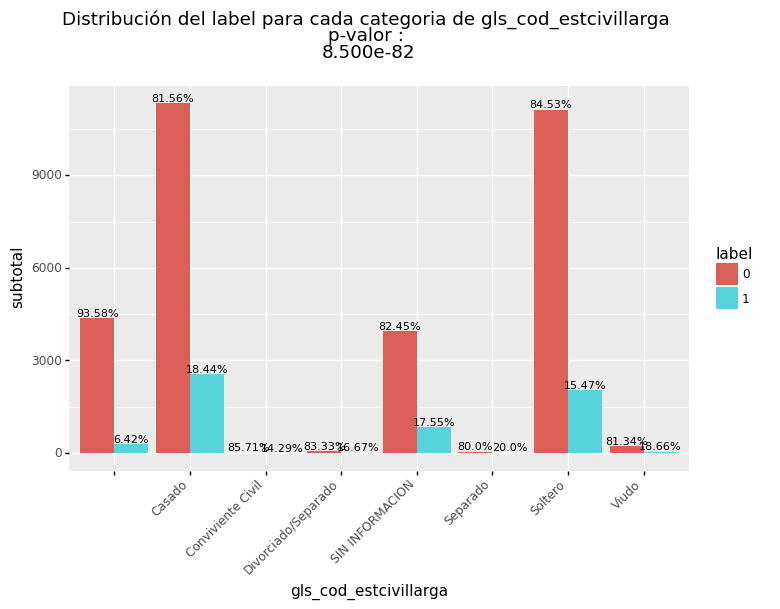

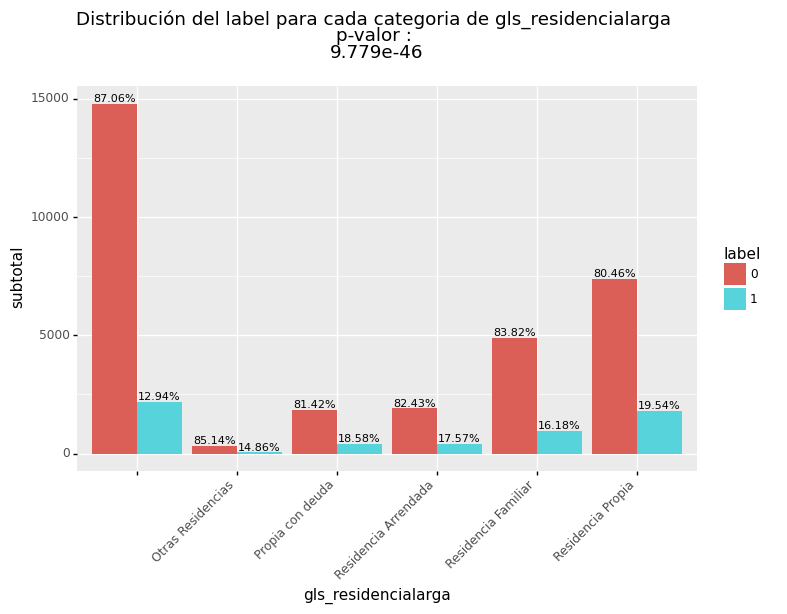

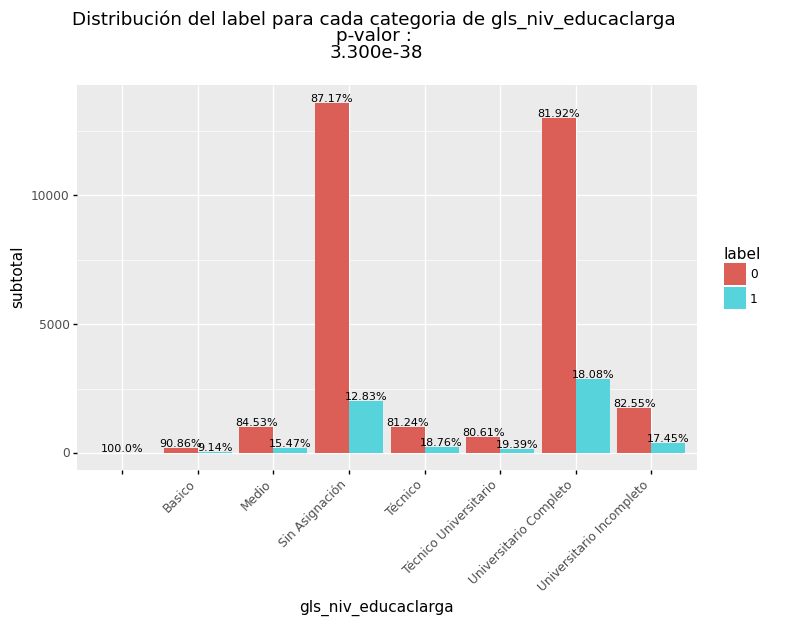

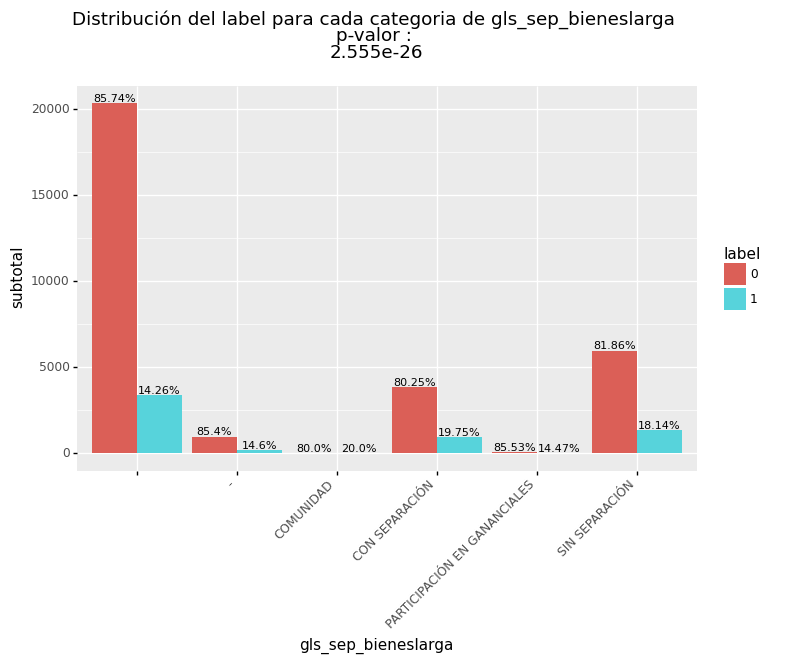

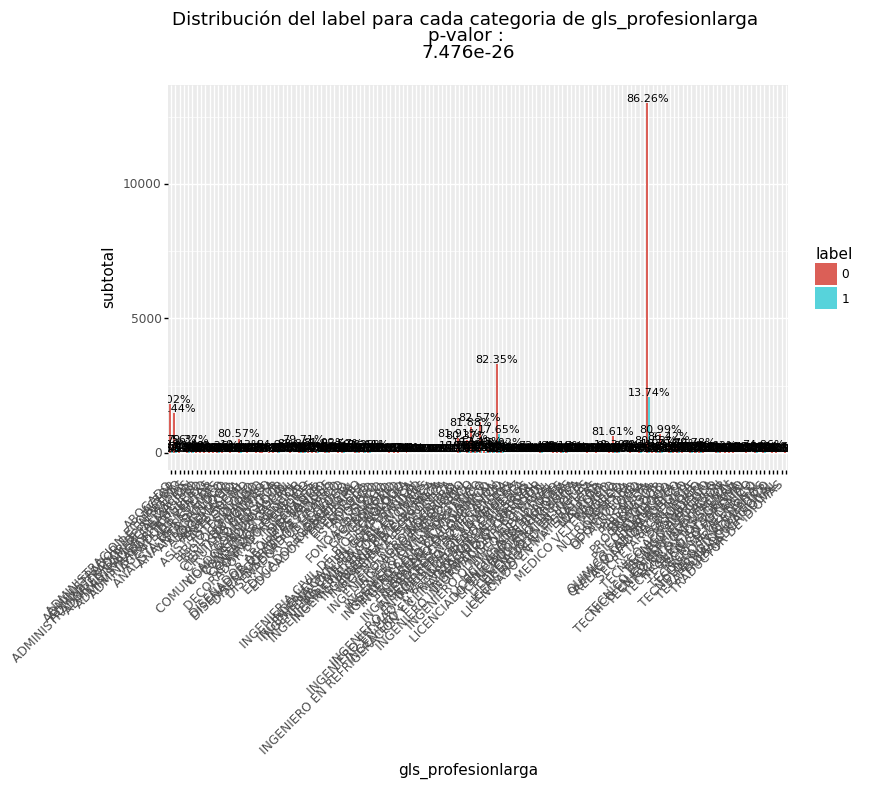

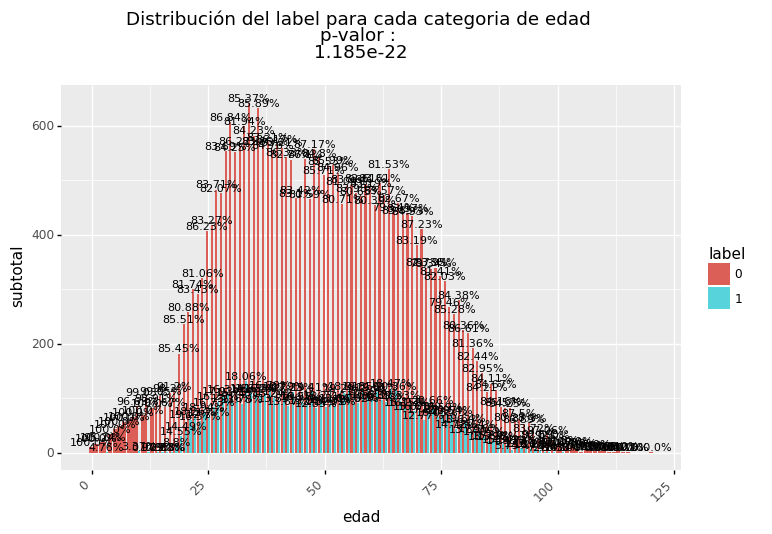

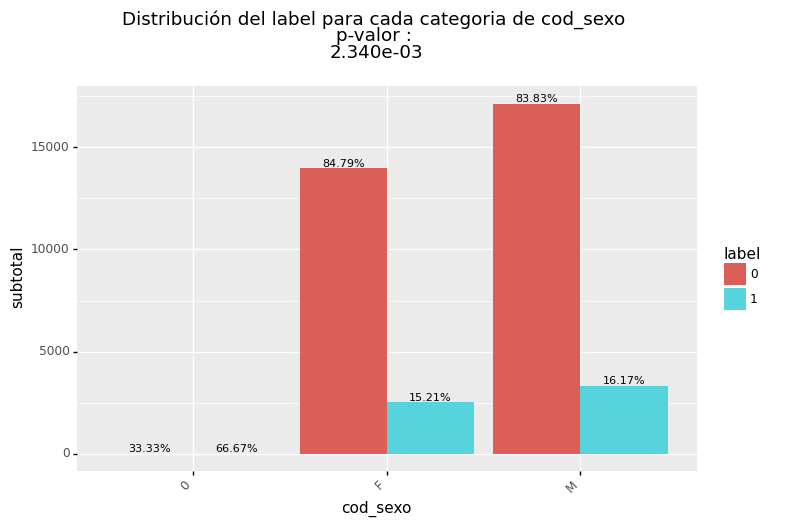

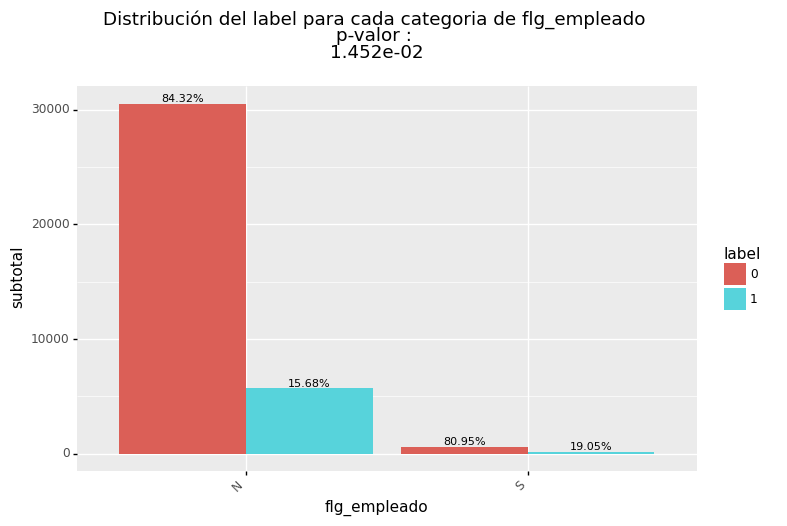

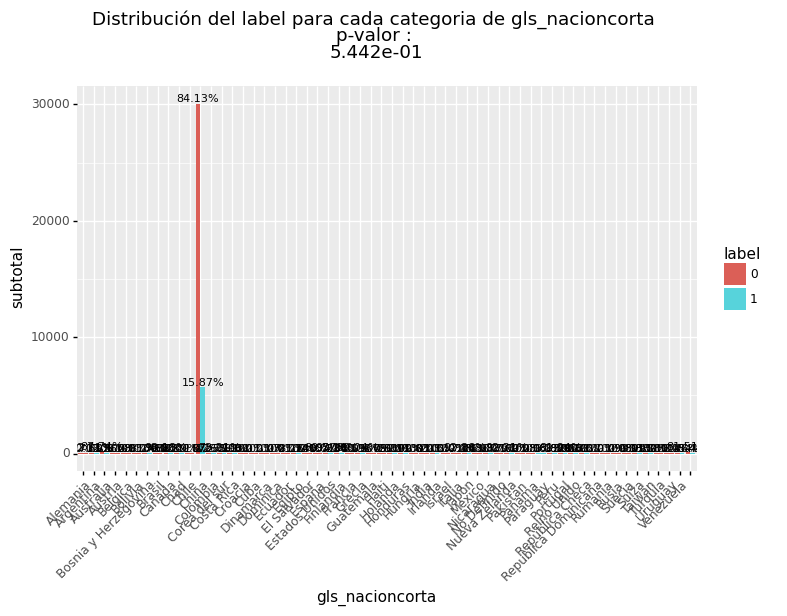

[<ggplot: (185625059970)>,
 <ggplot: (185630191499)>,
 <ggplot: (185627595298)>,
 <ggplot: (185625721351)>,
 <ggplot: (185626272250)>,
 <ggplot: (185627272304)>,
 <ggplot: (185626805059)>,
 <ggplot: (185624689550)>,
 <ggplot: (185623327088)>]

In [108]:
graficos_demograficos=[graph_sub_total_proc_label(
                df_estatico,
                g_x_label = s ,
                # g_x_label = "label" , # Etiqueta en eje x
                g_fill_label = "label",
                # g_fill_label = s,  # Etiqueta en eje x
                index_id_col = 'id',
                append_title = 
                            (f"""
p-valor : 
{df_chi.loc[df_chi.columna== s , 'p-valor'].to_list()[0]:.3e}
                            """),
                g_y_label = 'subtotal',
                g_point_label = 'porcentaje en %',
                fortmat_g_point_label = '{}%'
)[1] for s in df_chi.columna.to_list()
]
graficos_demograficos

In [111]:
sep_folder="/"
folder_graph = (
    f"C:{sep_folder}Users{sep_folder}rolft{sep_folder}Documents{sep_folder}Data-Scientist"
    f"{sep_folder}Presentación Desafio Bice{sep_folder}"
    )
save_as_pdf_pages(
    graficos_demograficos,
    f"{folder_graph}graficos_demograficos_label.pdf",
                            #   height=6, width=8
                              )

c:\Users\rolft\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:/Users/rolft/Documents/Data-Scientist/Presentación Desafio Bice/graficos_demograficos_label.pdf


#### Aportes_rescates_12m y Cuenta_banco

In [41]:
# Sólo clientes con información demografica
df_estatico = pd.merge(
    df_estatico,
    aportes_rescates_12m[['id']+columnas_estaticas['aportes_rescates_12m']], 
    how='inner',
    on='id',
    )
df_estatico.head()

,id,label,edad,flg_empleado,gls_nacioncorta,gls_residencialarga,gls_profesionlarga,cod_sexo,gls_cod_estcivillarga,gls_niv_educaclarga,gls_sep_bieneslarga,n_rescates,n_aportes
0,0,1,34,N,Chile,Residencia Arrendada,ABOGADO,M,Casado,Universitario Completo,SIN SEPARACIÓN,0.0,0.0
1,1,0,27,N,Chile,Residencia Familiar,ADMINISTRADOR DE SERVICIOS,F,Soltero,Universitario Completo,,7.0,11.0
2,2,1,65,N,Chile,Residencia Familiar,INGENIERO CIVIL INFORMATICO,M,Casado,Universitario Completo,SIN SEPARACIÓN,2.0,15.0
3,3,0,64,N,Chile,Propia con deuda,PSICOLOGO,F,Soltero,Universitario Completo,,10.0,37.0
4,4,0,30,N,Chile,Residencia Familiar,INGENIERO CIVIL INDUSTRIAL,M,Soltero,Universitario Completo,,4.0,4.0


In [42]:
# Sólo clientes con información demografica
df_estatico = pd.merge(
    df_estatico,
    cuenta_banco[['id']+columnas_estaticas['cuenta_banco']], 
    how='left',
    on='id',
    )
df_estatico.clasificacion_cliente=df_estatico.clasificacion_cliente.fillna("sin_segmento")
print(df_estatico.shape)
df_estatico.head()

(36941, 14)


,id,label,edad,flg_empleado,gls_nacioncorta,gls_residencialarga,gls_profesionlarga,cod_sexo,gls_cod_estcivillarga,gls_niv_educaclarga,gls_sep_bieneslarga,n_rescates,n_aportes,clasificacion_cliente
0,0,1,34,N,Chile,Residencia Arrendada,ABOGADO,M,Casado,Universitario Completo,SIN SEPARACIÓN,0.0,0.0,segmento_2
1,1,0,27,N,Chile,Residencia Familiar,ADMINISTRADOR DE SERVICIOS,F,Soltero,Universitario Completo,,7.0,11.0,segmento_1
2,2,1,65,N,Chile,Residencia Familiar,INGENIERO CIVIL INFORMATICO,M,Casado,Universitario Completo,SIN SEPARACIÓN,2.0,15.0,segmento_3
3,3,0,64,N,Chile,Propia con deuda,PSICOLOGO,F,Soltero,Universitario Completo,,10.0,37.0,segmento_3
4,4,0,30,N,Chile,Residencia Familiar,INGENIERO CIVIL INDUSTRIAL,M,Soltero,Universitario Completo,,4.0,4.0,segmento_2


In [43]:
col_x = columnas_estaticas['aportes_rescates_12m'] + columnas_estaticas['cuenta_banco']
y_col = "label"
df_chi=exp_lib.dataframe_chi_sqr(df_estatico,
                          col_x,
                          y_col
                          ).reset_index().drop(columns=["index"])
df_chi

['n_rescates' 'n_aportes' 'clasificacion_cliente']


,columna,Chi-cuadrad,p-valor,Grados_de_libertad
0,n_rescates,8950.552058,0.000000e+00,255
1,n_aportes,2885.955992,0.000000e+00,315
2,clasificacion_cliente,365.011756,1.005435e-77,4


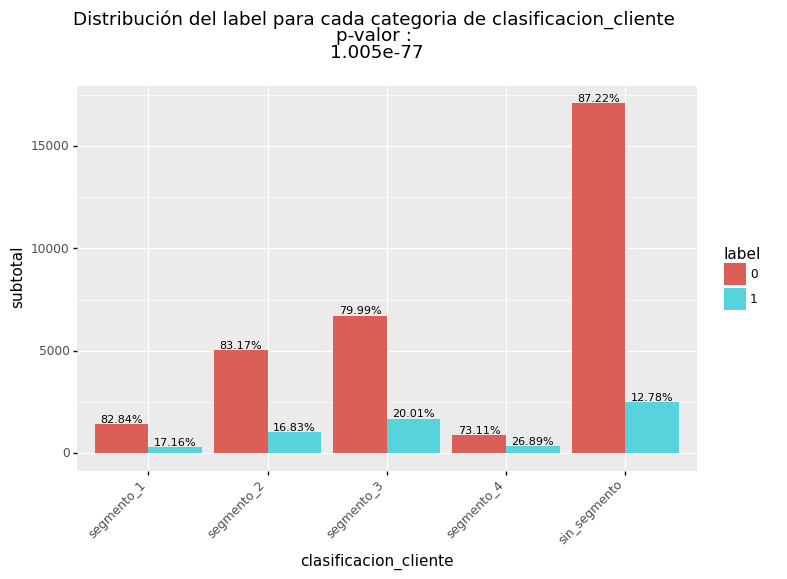

<ggplot: (104552107611)>

In [101]:
s = columnas_estaticas['cuenta_banco'][0]
graficos_estaticos_cuenta_banco=graph_sub_total_proc_label(
                df_estatico,
                g_x_label = s ,
                # g_x_label = "label" , # Etiqueta en eje x
                g_fill_label = "label",
                # g_fill_label = s,  # Etiqueta en eje x
                index_id_col = 'id',
                append_title = 
                            (f"""
p-valor : 
{df_chi.loc[df_chi.columna== s , 'p-valor'].to_list()[0]:.3e}
                            """),
                g_y_label = 'subtotal',
                g_point_label = 'porcentaje en %',
                fortmat_g_point_label = '{}%'
)[1] 
graficos_estaticos_cuenta_banco

In [102]:
sep_folder="/"
folder_graph = (
    f"C:{sep_folder}Users{sep_folder}rolft{sep_folder}Documents{sep_folder}Data-Scientist"
    f"{sep_folder}Presentación Desafio Bice{sep_folder}"
    )
graficos_estaticos_cuenta_banco.save( f"{folder_graph}graficos_cuenta_banco.pdf",)

c:\Users\rolft\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 8 x 5 in image.
c:\Users\rolft\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/rolft/Documents/Data-Scientist/Presentación Desafio Bice/graficos_cuenta_banco.pdf


 ##### Aportes_rescates_12m

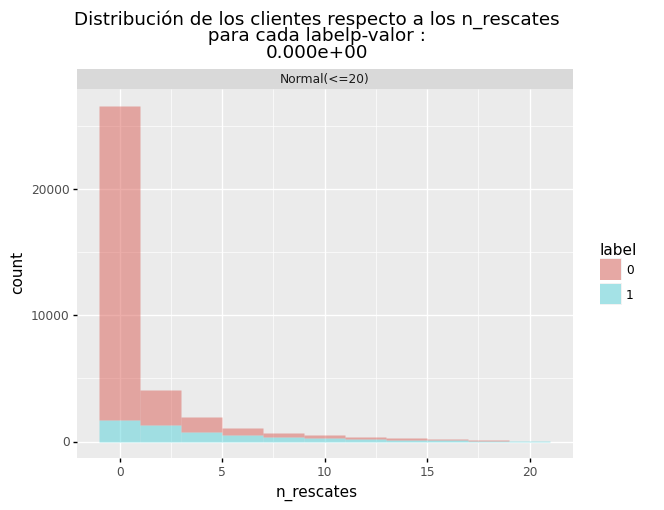

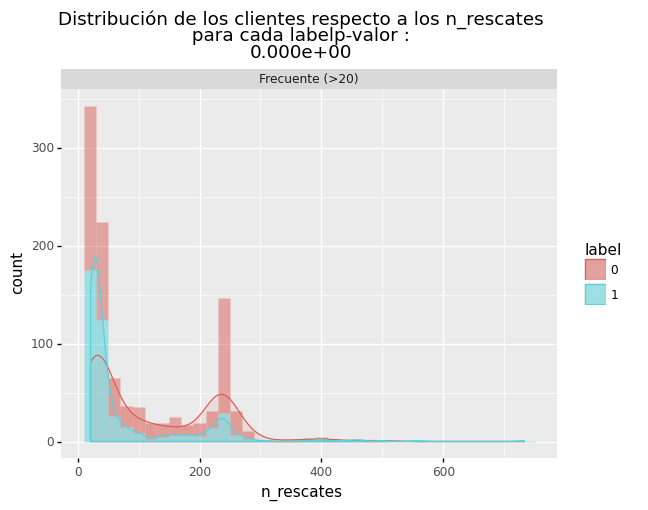

[<ggplot: (104426214909)>, <ggplot: (104435231169)>]

In [114]:

# Creación nueva columna
df_g=df_estatico.copy()
df_g["label"] =df_g["label"].astype("category")
df_g["tipo_recuperador"]=df_g[ columnas_estaticas['aportes_rescates_12m'][0] ].apply(
    lambda x: "Frecuente (>20)" if x>20 else "Normal(<=20)"
)
df_g.groupby("tipo_recuperador").describe().T

s_col =columnas_estaticas['aportes_rescates_12m'][0]
append_title = (f"""p-valor : 
{df_chi.loc[df_chi.columna== s_col , 'p-valor'].to_list()[0]:.3e}""")

g_title = (
    f"Distribución de los clientes respecto a los {s_col}" 
    f"\n para cada label"
    f"{append_title}"
    )
graficos_estaticos_tipo_recuperador=[(ggplot(df_g[df_g['tipo_recuperador'] == 'Normal(<=20)'],
        aes(x= s_col,
            color='label', fill='label'))
 #  + geom_density(aes(y=after_stat('count')), alpha=0.1)
 + geom_histogram(aes(fill='label', y=after_stat('count')),
                   binwidth=2, color='none', alpha=0.5)
+facet_grid(".~tipo_recuperador")
+ggtitle(g_title)

 ),
(ggplot(df_g[df_g['tipo_recuperador'] != 'Normal(<=20)'],
        aes(x= s_col,
            color='label', fill='label'))
 + geom_histogram(aes(fill='label', y=after_stat('count')),
                   binwidth=20, color='none', alpha=0.5)
  + geom_density(aes(y=after_stat('count*20')), alpha=0.1)
+facet_grid(".~tipo_recuperador")
+ggtitle(g_title)
 )
]
graficos_estaticos_tipo_recuperador

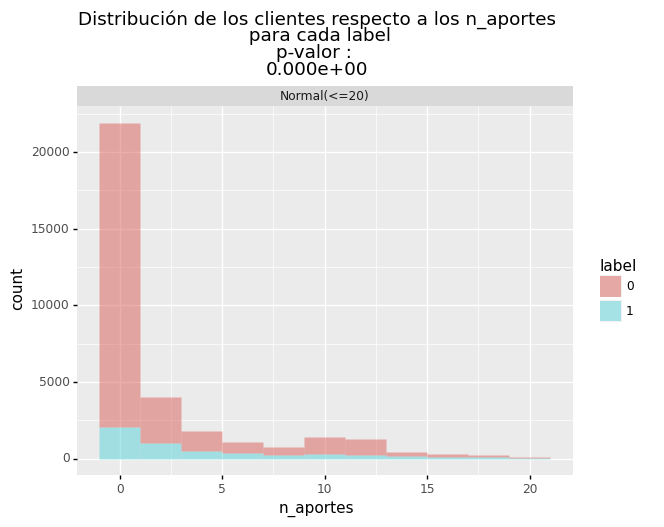

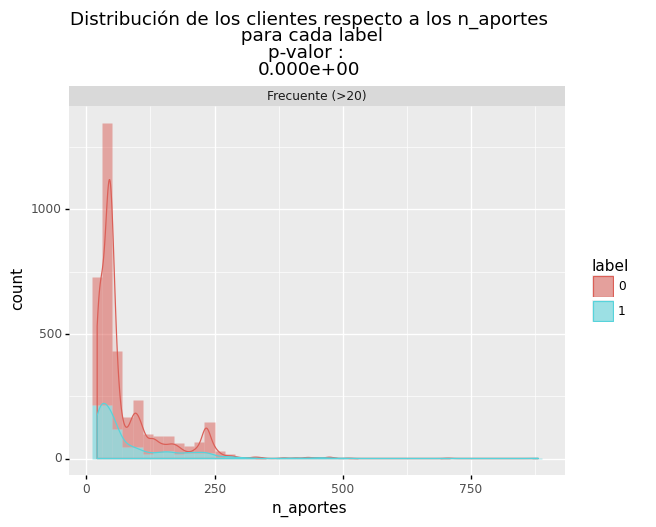

[<ggplot: (104426215867)>, <ggplot: (104435467066)>]

In [115]:
# Creación nueva columna
s_col =columnas_estaticas['aportes_rescates_12m'][1]
df_g["tipo_recuperador"]=df_g[ s_col ].apply(
    lambda x: "Frecuente (>20)" if x>20 else "Normal(<=20)"
)
df_g.groupby("tipo_recuperador").describe().T

append_title = (f"""
p-valor : 
{df_chi.loc[df_chi.columna== s_col , 'p-valor'].to_list()[0]:.3e}""")

g_title = (
    f"Distribución de los clientes respecto a los {s_col}" 
    f"\n para cada label"
    f"{append_title}"
    )

graficos_estaticos_tipo_aporte=[(ggplot(df_g[df_g['tipo_recuperador'] == 'Normal(<=20)'],
        aes(x= s_col,
            color='label', fill='label'))
 #  + geom_density(aes(y=after_stat('count')), alpha=0.1)
 + geom_histogram(aes(fill='label', y=after_stat('count')),
                   binwidth=2, color='none', alpha=0.5)
+facet_grid(".~tipo_recuperador")
+ggtitle(g_title)

 ),
(ggplot(df_g[df_g['tipo_recuperador'] != 'Normal(<=20)'],
        aes(x= s_col,
            color='label', fill='label'))
 + geom_histogram(aes(fill='label', y=after_stat('count')),
                   binwidth=20, color='none', alpha=0.5)
  + geom_density(aes(y=after_stat('count*20')), alpha=0.1)
+facet_grid(".~tipo_recuperador")
+ggtitle(g_title)
 )
]
graficos_estaticos_tipo_aporte

In [120]:
sep_folder="/"
folder_graph = (
    f"C:{sep_folder}Users{sep_folder}rolft{sep_folder}Documents{sep_folder}Data-Scientist"
    f"{sep_folder}Presentación Desafio Bice{sep_folder}"
    )
# lista_graph.save( f"{folder_graph}graficos_aportes_rescates_12m.pdf",)
save_as_pdf_pages(
    graficos_estaticos_tipo_recuperador+graficos_estaticos_tipo_aporte,
    f"{folder_graph}graficos_aportes_rescates_12m.pdf",
                            #   height=6, width=8
                              )

c:\Users\rolft\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:/Users/rolft/Documents/Data-Scientist/Presentación Desafio Bice/graficos_aportes_rescates_12m.pdf


In [133]:
for i in columnas_estaticas['aportes_rescates_12m']:
    df_estatico[f"ln({i})"] = df_estatico[i].apply(lambda x : np.log(x) if x>0 else -1)

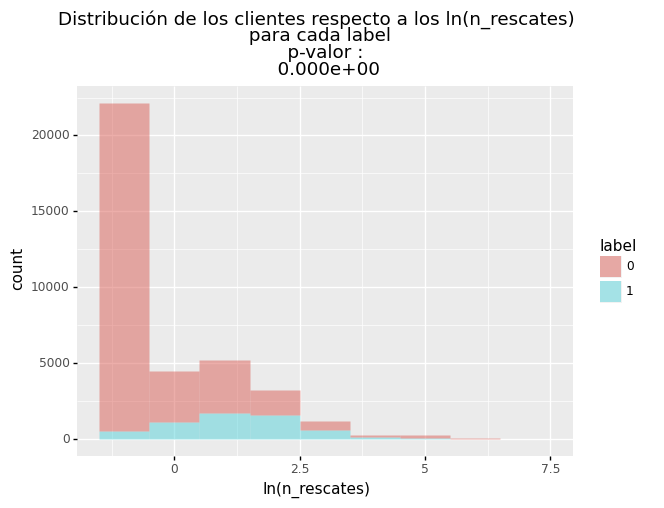

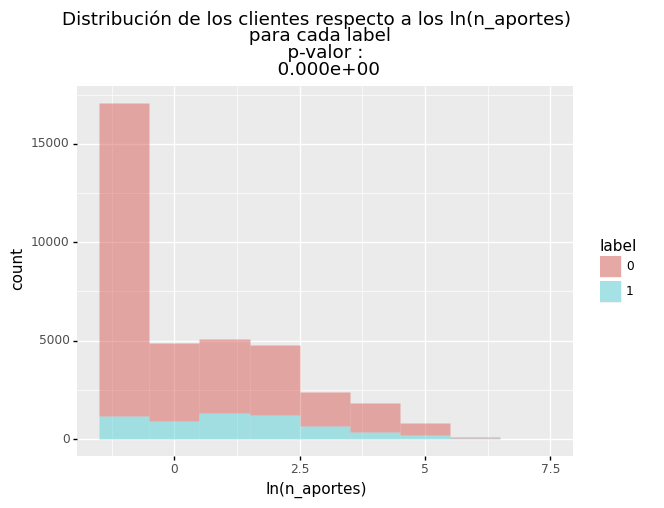

[<ggplot: (104426216608)>, <ggplot: (104430909392)>]

In [138]:
df_g = df_estatico.copy()
df_g["label"] =df_g["label"].astype("category")
g_array =[]
for i in columnas_estaticas['aportes_rescates_12m']:
    s_col= i
    append_title = (f"""
    p-valor : 
    {df_chi.loc[df_chi.columna== s_col , 'p-valor'].to_list()[0]:.3e}""")
    s_col=f"ln({s_col})"
    g_title = (
        f"Distribución de los clientes respecto a los {s_col}" 
        f"\n para cada label"
        f"{append_title}"
        )

    g_array.append(
        ggplot(df_g,
            aes(x= s_col,color='label', fill='label'))
    #   + geom_density(aes(y=after_stat('count')), alpha=0.1)
    + geom_histogram(aes(fill='label', y=after_stat('count')),
                    binwidth=1, color='none', alpha=0.5)
    # +facet_grid(".~")
    +ggtitle(g_title)
    )
g_array

In [137]:
# g_array
sep_folder="/"
folder_graph = (
    f"C:{sep_folder}Users{sep_folder}rolft{sep_folder}Documents{sep_folder}Data-Scientist"
    f"{sep_folder}Presentación Desafio Bice{sep_folder}"
    )
# lista_graph.save( f"{folder_graph}graficos_aportes_rescates_12m.pdf",)
save_as_pdf_pages(
    g_array,
    f"{folder_graph}graficos_ln-aportes_rescates_12m.pdf",
                            #   height=6, width=8
                              )

c:\Users\rolft\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:/Users/rolft/Documents/Data-Scientist/Presentación Desafio Bice/graficos_ln-aportes_rescates_12m.pdf


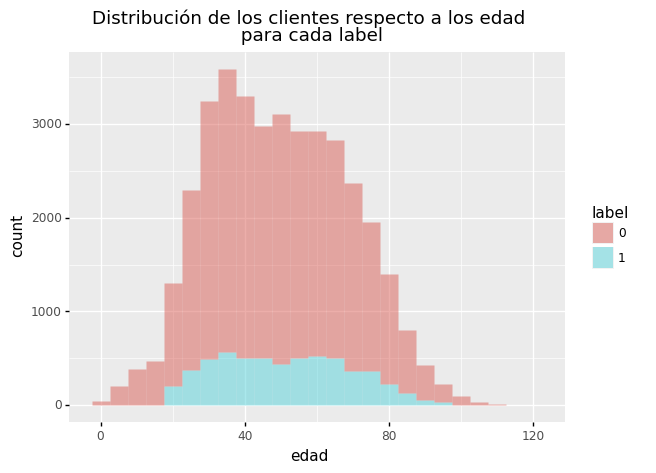

<ggplot: (104434898378)>

In [146]:
df_g = df_estatico.copy()
df_g["label"] =df_g["label"].astype("category")
s_col= "edad"
# s_col=f"ln({s_col})"
g_title = (
    f"Distribución de los clientes respecto a los {s_col}" 
    f"\n para cada label"
    )

g_edad = (
    ggplot(df_g,
        aes(x= s_col,color='label', fill='label'))
+ geom_histogram(aes(fill='label', y=after_stat('count')),
                binwidth=5, color='none', alpha=0.5)
# + geom_density(aes(y=after_stat('count*5')), alpha=0.1)
# +facet_grid(".~")
+ggtitle(g_title)
)
g_edad

In [147]:
# g_array
sep_folder="/"
folder_graph = (
    f"C:{sep_folder}Users{sep_folder}rolft{sep_folder}Documents{sep_folder}Data-Scientist"
    f"{sep_folder}Presentación Desafio Bice{sep_folder}"
    )
g_edad.save(f"{folder_graph}histograma_edad.pdf")

c:\Users\rolft\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\Users\rolft\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:/Users/rolft/Documents/Data-Scientist/Presentación Desafio Bice/histograma_edad.pdf


## Tablas historicas

### Patrimonio

In [150]:
df_patrimonio_label = \
    pd.merge(id_label,df_last_patrimonio,how="inner", on= "id")
print(
f"""
Total de registros de id_label {id_label.shape}
Total de registros de cuenta_banco {df_last_patrimonio.shape}
Cuentas que poseen información cuenta_banco:
    {df_patrimonio_label[df_patrimonio_label.fecha_cierre.notnull()].shape}
Cuentas sin información cuenta_banco:
    {df_patrimonio_label[df_patrimonio_label.fecha_cierre.notnull() == False].shape}
""")



Total de registros de id_label (37146, 2)
Total de registros de cuenta_banco (37139, 3)
Cuentas que poseen información cuenta_banco:
    (37139, 4)
Cuentas sin información cuenta_banco:
    (0, 4)



Timestamp('2023-02-28 00:00:00')

In [158]:
print("Fecha más actual",df_patrimonio_label["fecha_cierre"].max())
df_patrimonio_label["Recency"]=df_patrimonio_label["fecha_cierre"].apply(lambda x: 
                             int((exp_lib.convert_to_date("2023-02-28") 
                             - x).days)
                             )
df_patrimonio_label.head()

2023-02-28 00:00:00


,id,label,fecha_cierre,patrimonio,Recency
0,0,1,2023-02-28,10.296986,0
1,1,0,2023-02-28,9.079808,0
2,2,1,2023-01-31,11.179399,28
3,3,0,2023-02-28,12.532845,0
4,4,0,2023-02-28,8.817009,0


In [157]:
df_patrimonio_label.head()

,id,label,fecha_cierre,patrimonio,Recency
0,0,1,2023-02-28,10.296986,0
1,1,0,2023-02-28,9.079808,0
2,2,1,2023-01-31,11.179399,28
3,3,0,2023-02-28,12.532845,0
4,4,0,2023-02-28,8.817009,0


In [160]:
col_x = ["patrimonio", "Recency"]
y_col = "label"
df_chi=exp_lib.dataframe_chi_sqr(df_patrimonio_label,
                          col_x,
                          y_col
                          ).reset_index().drop(columns=["index"])
df_chi

['Recency' 'patrimonio']


,columna,Chi-cuadrad,p-valor,Grados_de_libertad
0,Recency,2619.934285,0.000000e+00,8
1,patrimonio,36113.197363,7.920552e-10,34504


c:\Users\rolft\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 4 rows containing non-finite values.


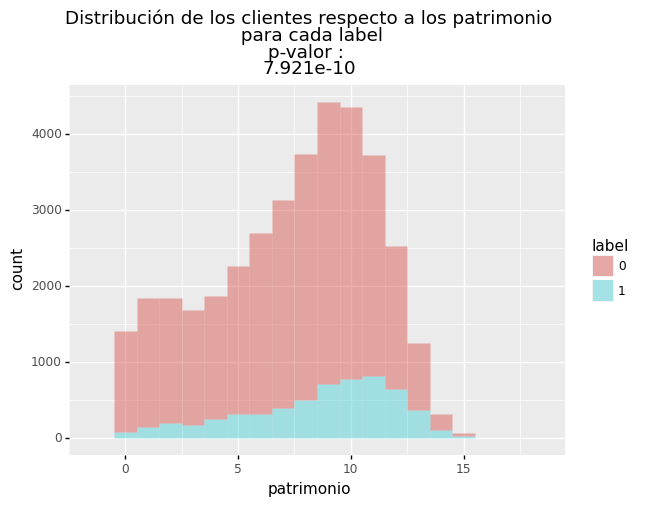

[<ggplot: (104435621699)>]

In [163]:
df_g = df_patrimonio_label.copy()
df_g["label"] =df_g["label"].astype("category")
g_array =[]
# for i in ["patrimonio", "Recency"]:
s_col= "patrimonio"
append_title = (f"""
p-valor : 
{df_chi.loc[df_chi.columna== s_col , 'p-valor'].to_list()[0]:.3e}""")
# s_col=f"ln({s_col})"
g_title = (
    f"Distribución de los clientes respecto a los {s_col}" 
    f"\n para cada label"
    f"{append_title}"
    )

g_array.append(
    ggplot(df_g,
        aes(x= s_col,color='label', fill='label'))
#   + geom_density(aes(y=after_stat('count')), alpha=0.1)
+ geom_histogram(aes(fill='label', y=after_stat('count')),
                binwidth=1, color='none', alpha=0.5)
# +facet_grid(".~")
+ggtitle(g_title)
)
g_array

c:\Users\rolft\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 4 rows containing non-finite values.


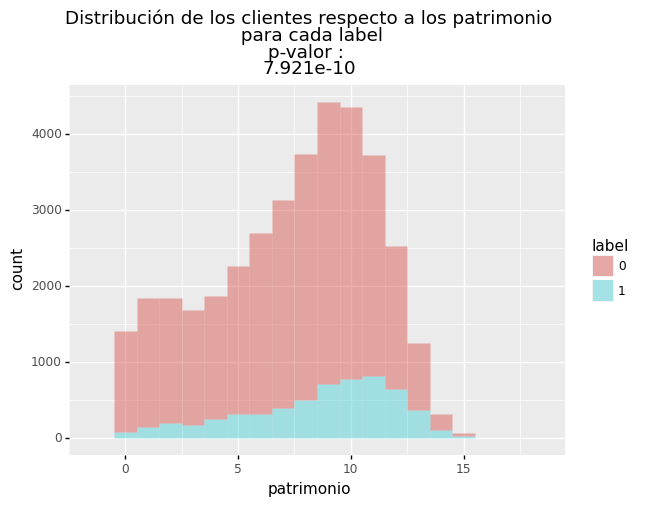

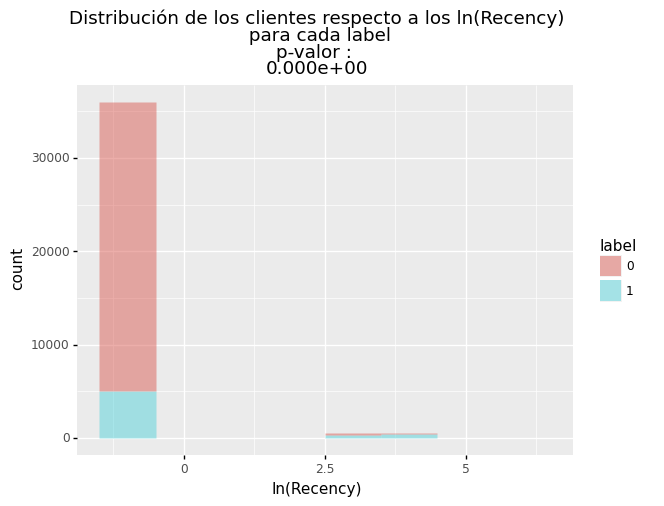

[<ggplot: (104435621699)>, <ggplot: (104427022439)>]

In [168]:
# for i in ["patrimonio", "Recency"]:
for i in ["patrimonio", "Recency"]:
    df_g[f"ln({i})"] = df_g[i].apply(lambda x : np.log(x) if x>0 else -1)
s_col= "Recency"
append_title = (f"""
p-valor : 
{df_chi.loc[df_chi.columna== s_col , 'p-valor'].to_list()[0]:.3e}""")
s_col=f"ln({s_col})"
g_title = (
    f"Distribución de los clientes respecto a los {s_col}" 
    f"\n para cada label"
    f"{append_title}"
    )

g_array.append(
    ggplot(df_g,
        aes(x= s_col,color='label', fill='label'))
#   + geom_density(aes(y=after_stat('count')), alpha=0.1)
+ geom_histogram(aes(fill='label', y=after_stat('count')),
                binwidth=1, color='none', alpha=0.5)
# +facet_grid(".~")
+ggtitle(g_title)
)
g_array

In [172]:
df_g.groupby(["label"]).describe().T

label                            0             1
id             count  31283.000000   5856.000000
               mean   18578.048237  18535.322575
               std    10717.275246  10758.323421
               min        1.000000      0.000000
               25%     9331.500000   9058.500000
               50%    18571.000000  18571.500000
               75%    27887.500000  27694.250000
               max    37145.000000  37142.000000
patrimonio     count  31279.000000   5856.000000
               mean       7.147077      8.580124
               std        3.578096      3.369351
               min       -1.194022     -0.010050
               25%        4.506035      6.457460
               50%        7.742785      9.300975
               75%        9.959871     11.117873
               max       17.564036     17.544284
Recency        count  31283.000000   5856.000000
               mean       0.536713      6.301400
               std        5.852978     16.919557
               min        0.000000      0.000000
               25%        0.000000      0.000000
               50%        0.000000      0.000000
               75%        0.000000      0.000000
               max      365.000000    212.000000
ln(patrimonio) count  31283.000000   5856.000000
               mean       1.663916      1.992011
               std        1.134148      0.762428
               min       -6.908255     -6.908255
               25%        1.504982      1.865236
               50%        2.046677      2.230119
               75%        2.298536      2.408554
               max        2.865853      2.864728
ln(Recency)    count  31283.000000   5856.000000
               mean      -0.944298     -0.341875
               std        0.510712      1.646496
               min       -1.000000     -1.000000
               25%       -1.000000     -1.000000
               50%       -1.000000     -1.000000
               75%       -1.000000     -1.000000
               max        5.899897      5.356586